In [8]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
import glob
import os
import metpy
import metpy.calc as mpcalc
from metpy.units import units
import numpy as np
from datetime import datetime
import xarray as xr
from pint import UnitRegistry
ureg = UnitRegistry()
import seaborn as sns
from scipy.stats import sem
from scipy import stats
from scipy.stats import f_oneway
import statsmodels.api as sm
from scipy.stats import t
import calendar

In [2]:
# Load datasets
df = pd.read_csv("C:\\YEAR1\\NMVOC\\Data\\processed_c3h8.csv", parse_dates=['datetime'])
df

,datetime,C3H8_ppb
0,2011-01-05 00:00:00,0.70974
1,2011-01-05 02:00:00,0.78550
2,2011-01-05 04:00:00,0.72628
3,2011-01-05 06:00:00,0.94738
4,2011-01-05 08:00:00,0.74331
...,...,...
41494,2023-12-31 02:00:00,0.07656
41495,2023-12-31 04:00:00,0.11815
41496,2023-12-31 05:00:00,0.10664
41497,2023-12-31 07:00:00,0.10012


In [3]:
# helper columns with  hour, month, year
#df['hour'] = df['starttime_dt'].dt.hour
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['date'] = df['datetime'].dt.date
df['day_m'] = df['datetime'].dt.day
df['day'] = df['datetime'].dt.dayofyear
df["hour"] = df['datetime'].dt.hour
df

,datetime,C3H8_ppb,month,year,date,day_m,day,hour
0,2011-01-05 00:00:00,0.70974,1,2011,2011-01-05,5,5,0
1,2011-01-05 02:00:00,0.78550,1,2011,2011-01-05,5,5,2
2,2011-01-05 04:00:00,0.72628,1,2011,2011-01-05,5,5,4
3,2011-01-05 06:00:00,0.94738,1,2011,2011-01-05,5,5,6
4,2011-01-05 08:00:00,0.74331,1,2011,2011-01-05,5,5,8
...,...,...,...,...,...,...,...,...
41494,2023-12-31 02:00:00,0.07656,12,2023,2023-12-31,31,365,2
41495,2023-12-31 04:00:00,0.11815,12,2023,2023-12-31,31,365,4
41496,2023-12-31 05:00:00,0.10664,12,2023,2023-12-31,31,365,5
41497,2023-12-31 07:00:00,0.10012,12,2023,2023-12-31,31,365,7


In [4]:

# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

# Add season (DJF, MAM, JJA, SON)

# Define season function
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)



# Function to determine season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

#season
seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
month_to_season = dict(zip(range(1, 13), seasons))
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Ensure 'date' column is in datetime format
# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

S = df.date.dt.month.map(month_to_season) 
df['season_1'] = S
df

,datetime,C3H8_ppb,month,year,date,day_m,day,hour,season,season_1
0,2011-01-05 00:00:00,0.70974,1,2011,2011-01-05,5,5,0,Winter,1
1,2011-01-05 02:00:00,0.78550,1,2011,2011-01-05,5,5,2,Winter,1
2,2011-01-05 04:00:00,0.72628,1,2011,2011-01-05,5,5,4,Winter,1
3,2011-01-05 06:00:00,0.94738,1,2011,2011-01-05,5,5,6,Winter,1
4,2011-01-05 08:00:00,0.74331,1,2011,2011-01-05,5,5,8,Winter,1
...,...,...,...,...,...,...,...,...,...,...
41494,2023-12-31 02:00:00,0.07656,12,2023,2023-12-31,31,365,2,Winter,1
41495,2023-12-31 04:00:00,0.11815,12,2023,2023-12-31,31,365,4,Winter,1
41496,2023-12-31 05:00:00,0.10664,12,2023,2023-12-31,31,365,5,Winter,1
41497,2023-12-31 07:00:00,0.10012,12,2023,2023-12-31,31,365,7,Winter,1


In [ ]:
df["C3H8_ppb"].plot()

In [ ]:
df.groupby(['year', 'month']).mean("C3H8_ppb")

C:\Users\EnricoMancinelli\AppData\Local\Temp\ipykernel_16836\3737373195.py:1: FutureWarning: The provided callable <function mean at 0x0000017AAE30BF60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  monthly_means = df.groupby(['year', 'month'])[("C3H8_ppb")].agg([np.mean,np.median])
C:\Users\EnricoMancinelli\AppData\Local\Temp\ipykernel_16836\3737373195.py:1: FutureWarning: The provided callable <function median at 0x0000017AAE43C2C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  monthly_means = df.groupby(['year', 'month'])[("C3H8_ppb")].agg([np.mean,np.median])


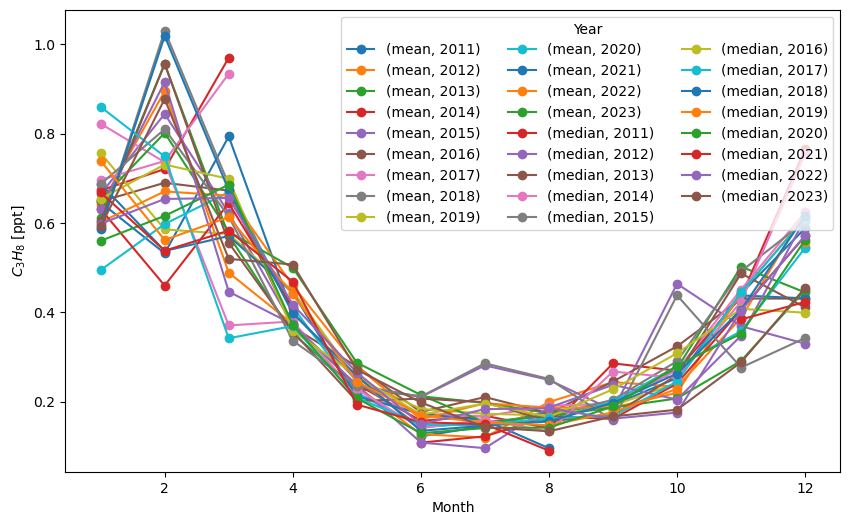

In [6]:
monthly_means = df.groupby(['year', 'month'])[("C3H8_ppb")].agg([np.mean,np.median])

# Reshape the data so that each year is a column and each month is a row
monthly_means_unstacked = monthly_means.unstack(level=0)  # Unstack 'Year' to create separate columns for each year

# Plotting the monthly means for each year
ax = monthly_means_unstacked.plot(figsize=(10, 6), style='-o')

# Customize plot labels
ax.set_xlabel("Month")  # X-axis label
ax.set_ylabel("$C_3H_8$ [ppt]")  # Y-axis label
#ax.set_title("Monthly Means of C3H8 ppt for Each Year")  # Plot title
ax.legend(title="Year", loc="upper right",  ncol=3) 

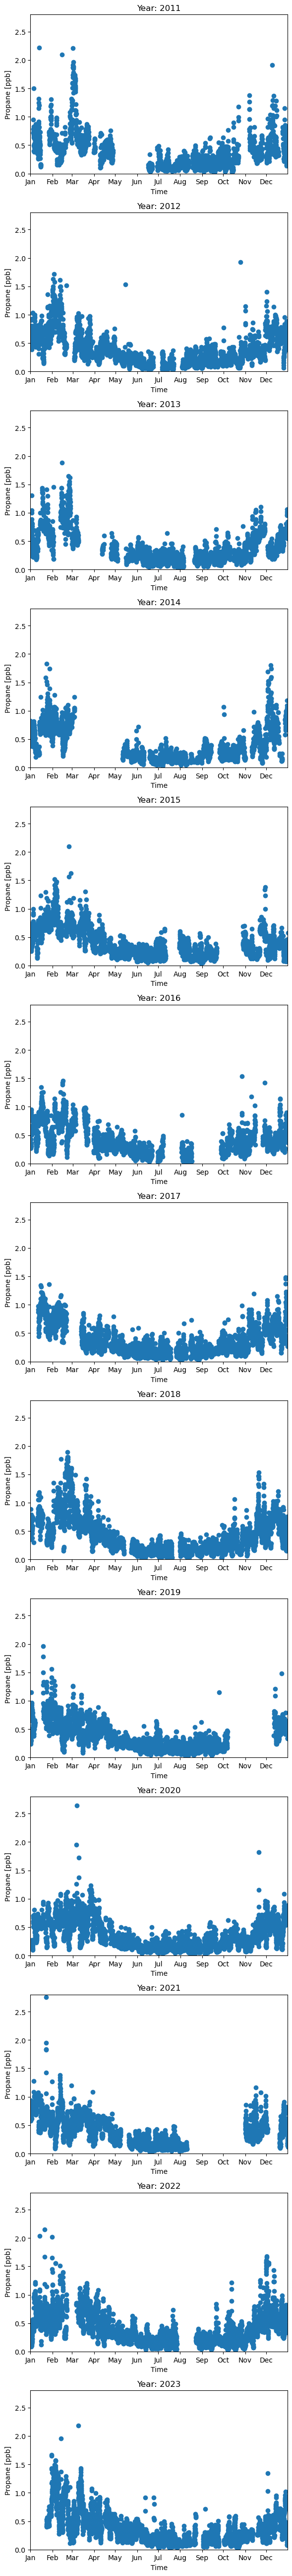

In [7]:
#scatter plot by year

# Group data by 'year'
grouped = df.groupby('year')

# Create subplots (one for each year)
num_years = df['year'].nunique()  # Get unique years count
fig, axes = plt.subplots(nrows=num_years, ncols=1, figsize=(6, num_years * 4))

# Ensure axes is iterable even if there's only one plot
if num_years == 1:
    axes = [axes]

# Plot scatter plot for each year in its subplot
for (year, group), ax in zip(grouped, axes):
    ax.scatter(group['datetime'], group['C3H8_ppb'])
    ax.set_title(f'Year: {year}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Propane [ppb]')
    ax.set_ylim(0, 2.8)

    # Set x-axis limits from Jan 1 to Dec 31 of the given year
    start = pd.Timestamp(f'{year}-01-01')
    end = pd.Timestamp(f'{year}-12-31')
    ax.set_xlim([start, end])

    # Set x-axis ticks to the first day of each month
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()


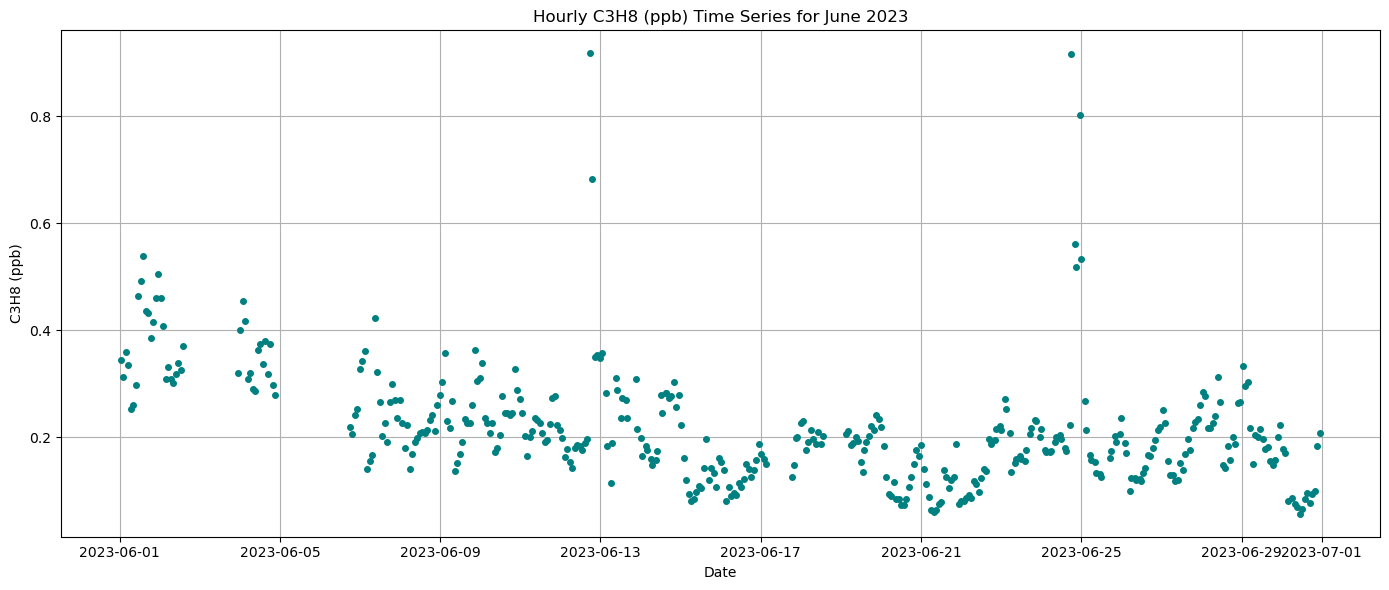

In [12]:
# Filter data for June 2023
df_filtered = df[(df['year'] == 2023) & (df['month'] == 6)]

# Optional: sort by datetime
df_filtered = df_filtered.sort_values('datetime')

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(df_filtered['datetime'], df_filtered['C3H8_ppb'], marker='o', linestyle='', markersize=4, color='teal')
plt.title("Hourly C3H8 (ppb) Time Series for June 2023")
plt.xlabel("Date")
plt.ylabel("C3H8 (ppb)")
plt.grid(True)
plt.tight_layout()
plt.show()


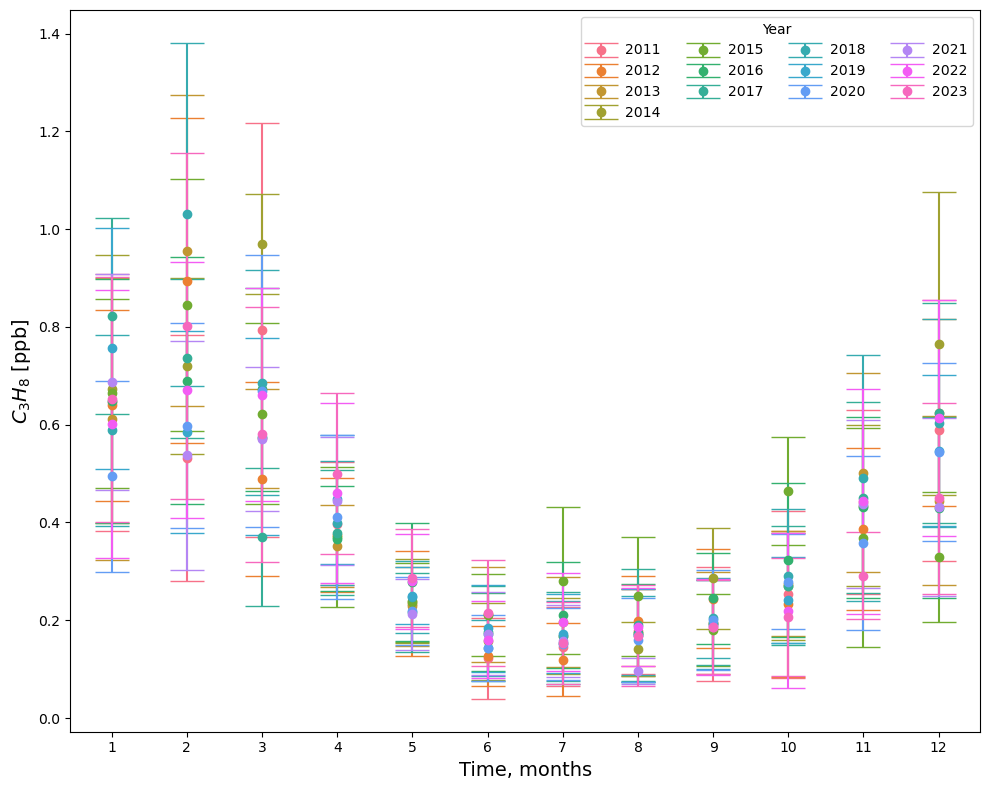

In [8]:
# Group by year and month to calculate means and standard deviations
grouped = df.groupby(['year', 'month']).agg(
    mean_value=('C3H8_ppb', 'mean'),
    std_value=('C3H8_ppb', 'std')
).reset_index()

# Create a color palette based on the number of years
years = grouped['year'].unique()
palette = sns.color_palette("husl", len(years))  # Unique color for each year

# Create the scatter plot
plt.figure(figsize=(10, 8))

# Loop through each year to plot means with error bars (standard deviation)
for i, year in enumerate(years):
    year_data = grouped[grouped['year'] == year]
    plt.errorbar(year_data['month'], year_data['mean_value'], yerr=year_data['std_value'], 
                 label=f'{year}', fmt='o', capsize=12, color=palette[i])

# Customize the plot
#plt.title('Monthly Means and Standard Deviations by Year')
plt.xlabel("Time, months",fontsize=14)
plt.ylabel('$C_3H_8$ [ppb]',fontsize=14)
plt.tick_params(axis='both', which='both', labelsize=10)
# Set x-ticks from 1 to 12 with an interval of 1
plt.xticks(ticks=range(1, 13), labels=range(1, 13))  # Months 1 to 12
#plt.ylim(0,1400)
# Remove the grid lines
plt.grid(False)

# Add legend for the years
plt.legend(title='Year', loc="upper right", ncol=4)

# Show the plot
plt.tight_layout()
#plt.savefig("C:\\YEAR1\\NMVOC\\code\\figures\\c3h8_CMN_month_mean.png", dpi=300)
plt.show()

In [ ]:
# Find max and min for each month and their corresponding year
max_min_results = []

for month in df['month'].unique():
    month_data = df[df['month'] == month]
    
    # Find max and min rows
    max_row = month_data.loc[month_data['C3H8_ppb'].idxmax()]
    min_row = month_data.loc[month_data['C3H8_ppb'].idxmin()]
    
    # Append results to list for printing later
    max_min_results.append({
        'Month': month,
        'Max Value': max_row['C3H8_ppb'],
        'Max Year': max_row['year'],
        'Min Value': min_row['C3H8_ppb'],
        'Min Year': min_row['year']
    })

# Convert the results to a DataFrame for a clean print
max_min_df = pd.DataFrame(max_min_results)

# Print the max and min values for each month with the respective year
max_min_df.round(3)

In [ ]:
# Step 1: Calculate monthly mean for each year and month combination
monthly_means = df.groupby(['year', 'month']).agg(
    mean_value=('C3H8_ppb', 'mean')
).reset_index()

# Step 2: Find max and min mean for each month and the corresponding year
max_min_results = []

for month in monthly_means['month'].unique():
    month_data = monthly_means[monthly_means['month'] == month]
    
    # Find max and min rows
    max_row = month_data.loc[month_data['mean_value'].idxmax()]
    min_row = month_data.loc[month_data['mean_value'].idxmin()]
    
    # Append results to list for printing later
    max_min_results.append({
        'Month': month,
        'Max Mean': max_row['mean_value'],
        'Max Year': max_row['year'],
        'Min Mean': min_row['mean_value'],
        'Min Year': min_row['year']
    })

# Convert the results to a DataFrame for a clean print
max_min_df = pd.DataFrame(max_min_results)

# Print the max and min mean values for each month with the respective year
# Print the max and min values for each month with the respective year
max_min_df.round(3)

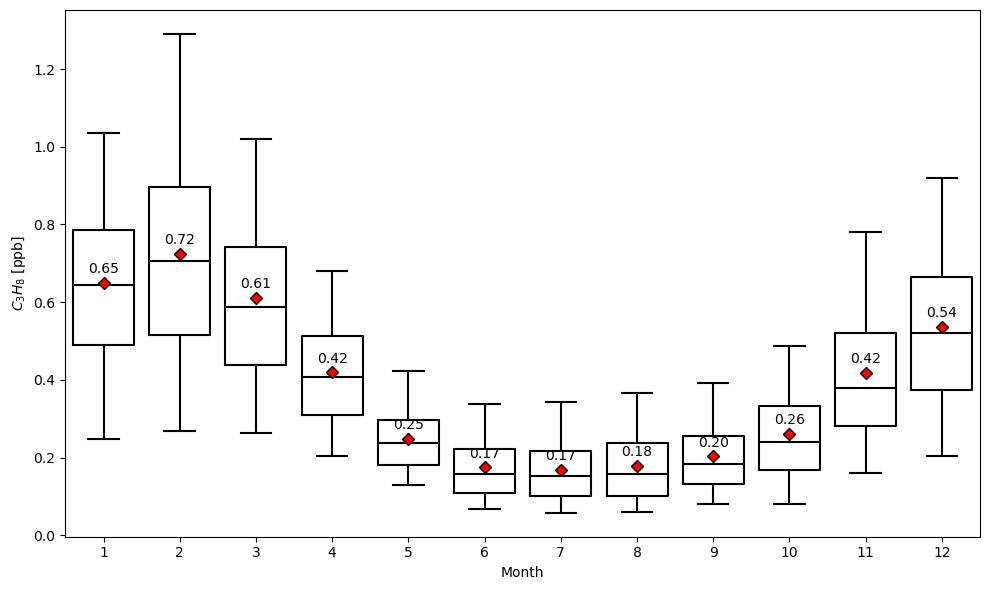

In [13]:

# Plotting
plt.figure(figsize=(10, 6))

# Create a boxplot for each month across all years
sns.boxplot(x='month', y='C3H8_ppb', data=df, color='white', showfliers=False, # Hide outliers
        whis=[5, 95],      # Whiskers representing 5th–95th percentiles
        showmeans=True,
        fill=False,
        meanprops={"marker": "D", "markerfacecolor": "red", "markeredgecolor": "black"},
        boxprops={'color': 'black'}, medianprops={'color': 'black'},
        whiskerprops={'color': 'black'}, capprops={'color': 'black'})

# Calculate means and overlay them as red diamonds with annotations
monthly_means = df.groupby('month')['C3H8_ppb'].mean()

# Annotate mean values above each marker
for month, mean in monthly_means.items():
    plt.text(month - 1, mean + 0.025, f'{mean:.2f}', color='black', ha='center')   

# Customize the plot
#plt.title("Monthly Boxplots with Mean Values (2011-2023)")
plt.xlabel("Month")
plt.ylabel("$C_3H_8$ [ppb]")
plt.xticks(ticks=np.arange(12), labels=[str(i) for i in range(1, 13)])
# Show the plot
plt.tight_layout()
plt.savefig("C:\\YEAR1\\NMVOC\\figures\\c3h8_CMN_month.png", dpi=300)
plt.show()


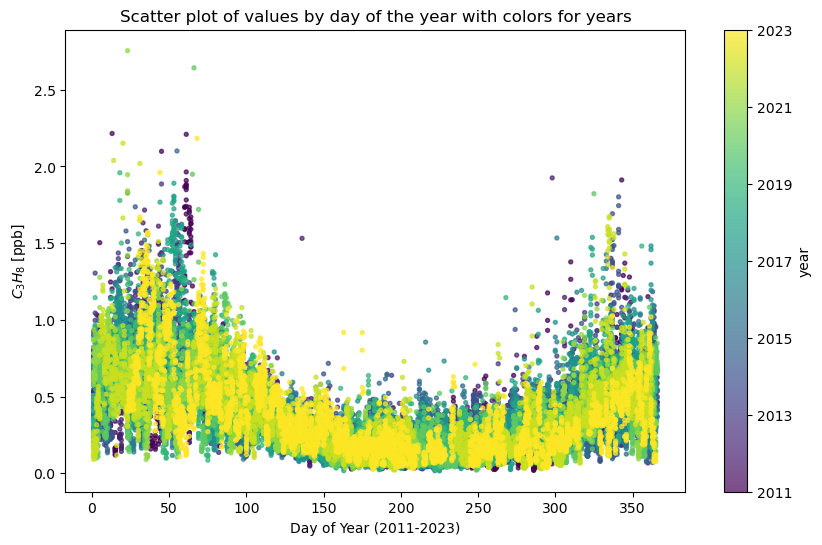

In [17]:
# Set plot style

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['day'], df['C3H8_ppb'], c=df['year'], cmap='viridis', alpha=0.7, s=8, marker='o')

# Add color bar to show which color corresponds to which year
cbar = plt.colorbar(scatter, label='year')
cbar.set_ticks([2011, 2013, 2015, 2017, 2019, 2021, 2023])
cbar.set_ticklabels([str(y) for y in [2011, 2013, 2015, 2017, 2019, 2021, 2023]])

# If you want to set the color limits, use:
scatter.set_clim(2011, 2023)

# Labels and title
plt.xlabel('Day of Year (2011-2023)')
plt.ylabel('$C_3H_8$ [ppb]')
plt.title('Scatter plot of values by day of the year with colors for years')

# Show plot
plt.show()

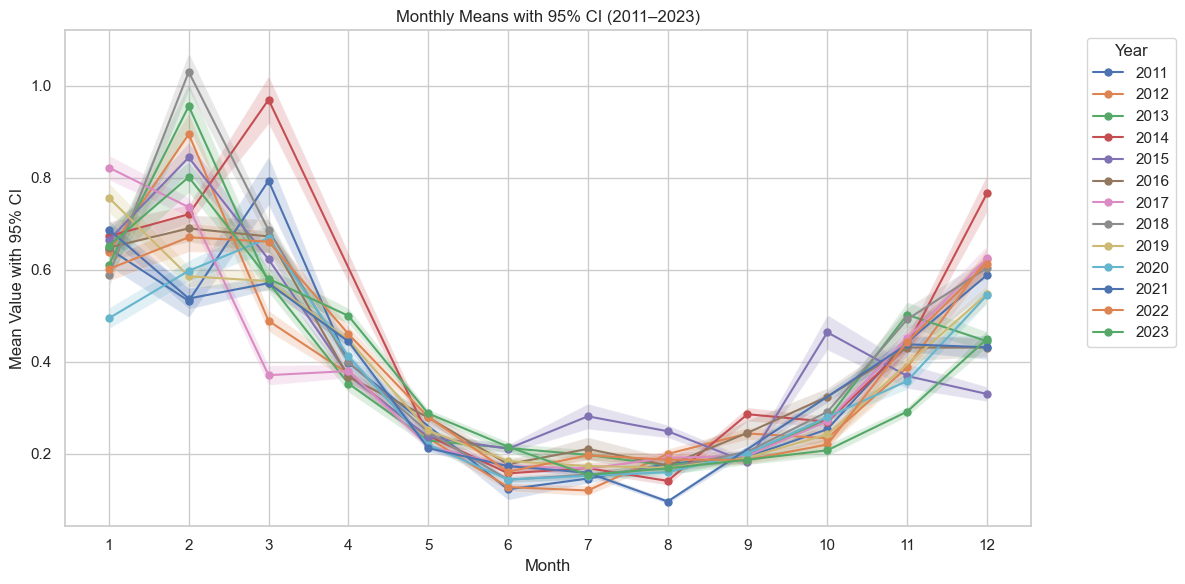

In [10]:


#shaded area around each line representing the 95% confidence 
# (1.96 * SEM is used for a 95% confidence interval assuming a normal distribution)

# Group by year and month
grouped = df.groupby(['year', 'month'])['C3H8_ppb']

# Calculate mean, count, standard error, and 95% CI
summary = grouped.agg(['mean', 'count', sem]).reset_index()
summary['ci95'] = 1.96 * summary['sem']  # Using normal approximation

# Plotting
plt.figure(figsize=(12, 6))
years = summary['year'].unique()

for year in years:
    data = summary[summary['year'] == year]
    plt.plot(data['month'], data['mean'], label=str(year), marker='o', markersize=5)
    plt.fill_between(data['month'],
                     data['mean'] - data['ci95'],
                     data['mean'] + data['ci95'],
                     alpha=0.2)

plt.xlabel('Month')
plt.ylabel('Mean Value with 95% CI')
plt.title('Monthly Means with 95% CI (2011–2023)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



C:\Users\EnricoMancinelli\AppData\Local\Temp\ipykernel_6224\291291526.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\EnricoMancinelli\AppData\Local\Temp\ipykernel_6224\291291526.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\EnricoMancinelli\AppData\Local\Temp\ipykernel_6224\291291526.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\EnricoMancinelli\AppData\Local\Temp\ipykernel_6224\291291526.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xti

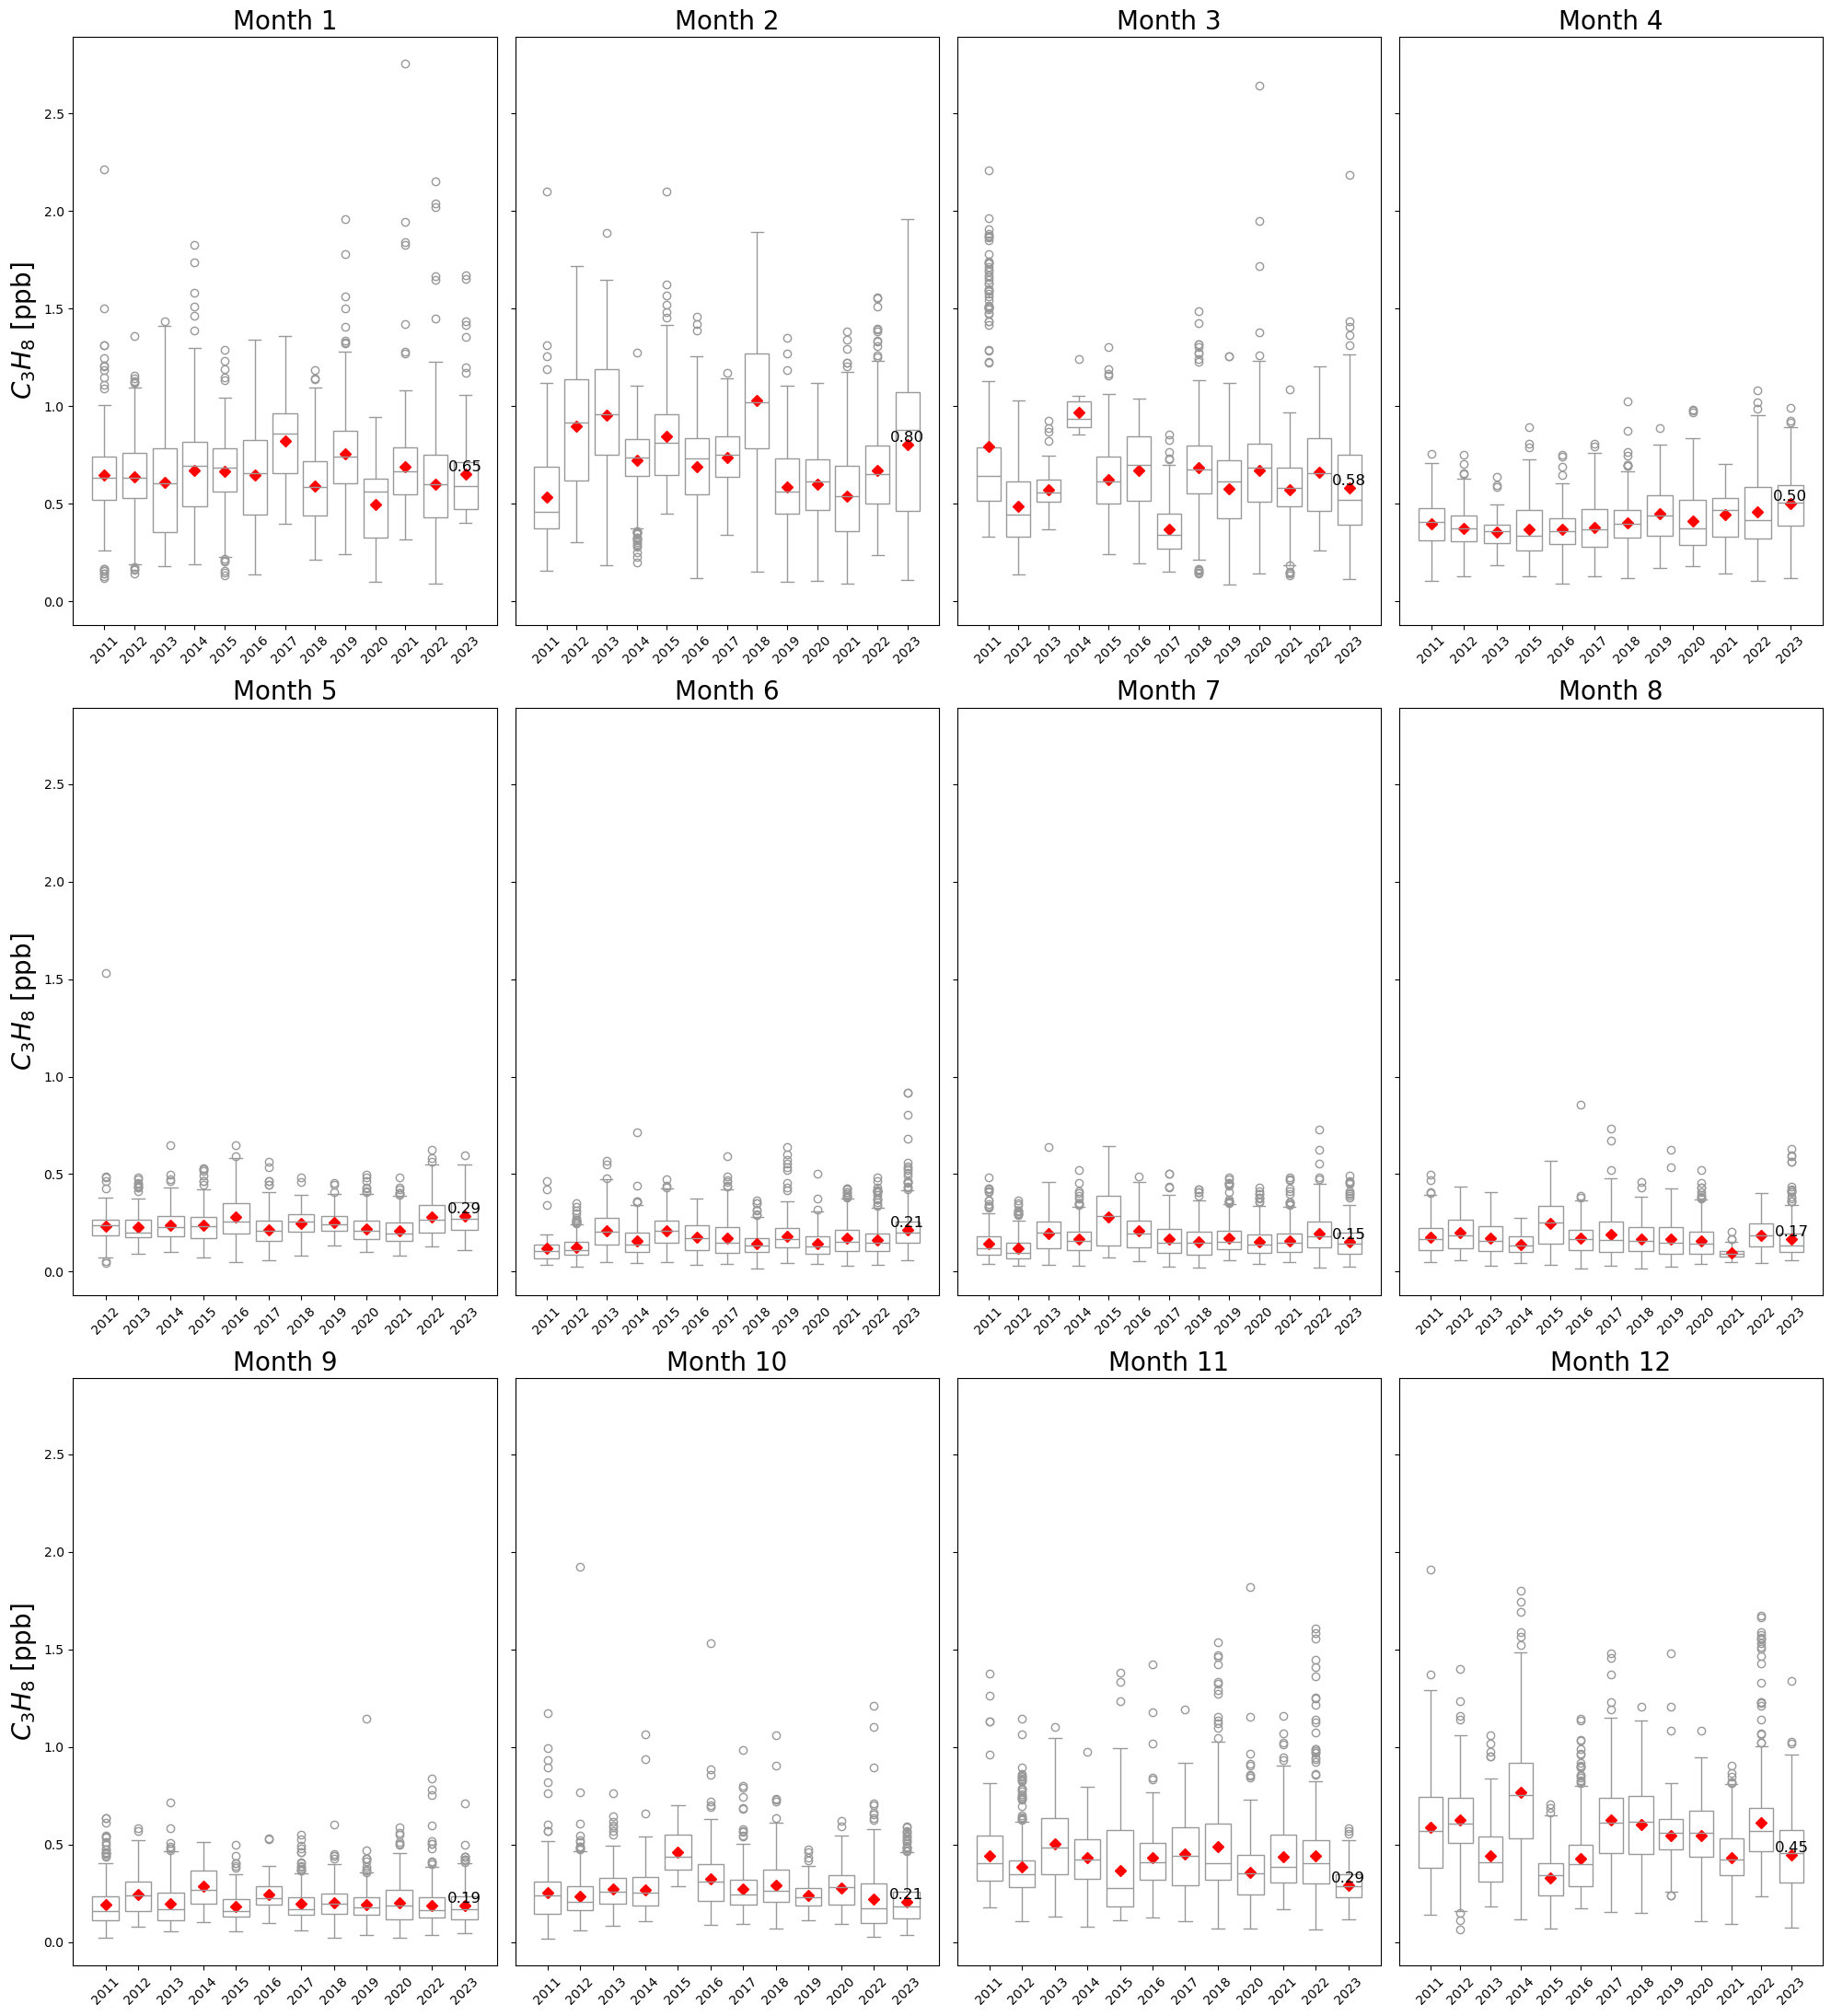

In [7]:
#boxplot with means for each month across all years, with diamonds representing the mean values

# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 22), sharey=True)
axes = axes.flatten()

for month in range(1, 13):
    ax = axes[month - 1]
    month_data = df[df['month'] == month]
    if month_data.empty:
        continue

    # Sort years with data
    year_order = sorted(month_data['year'].unique())
    
    # Boxplot with correct year order
    sns.boxplot(data=month_data, x='year', y='C3H8_ppb', order=year_order, 
                ax=ax, color='white', showmeans=False) #,showfliers=False)

    # Plot diamonds at the center of each box
    means = month_data.groupby('year')['C3H8_ppb'].mean()
    for i, year in enumerate(year_order):
        if year in means:
            ax.plot(i, means[year], marker='D', color='red', label='Mean' if month == 1 and i == 0 else "")

    ax.set_title(f'Month {month}', fontsize=20)
    # Only label mean for odd years
    if year % 2 == 1 and year in means:
        ax.text(i, means[year], f'{means[year]:.2f}', color='black', ha='center', va='bottom', fontsize=12)
    ax.set_xlabel('', fontsize=20)
    ax.set_ylabel('$C_3H_8$ [ppb]' if month in [1, 5, 9] else '', fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add a single legend
handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=1)

#plt.suptitle('Monthly Boxplots of C3H8_ppb (2011–2023)\nDiamonds represent mean values', fontsize=16)
plt.tight_layout()

plt.savefig("C:\\YEAR1\\NMVOC\\figures\\c3h8_box_month.png", dpi=300)
plt.show()

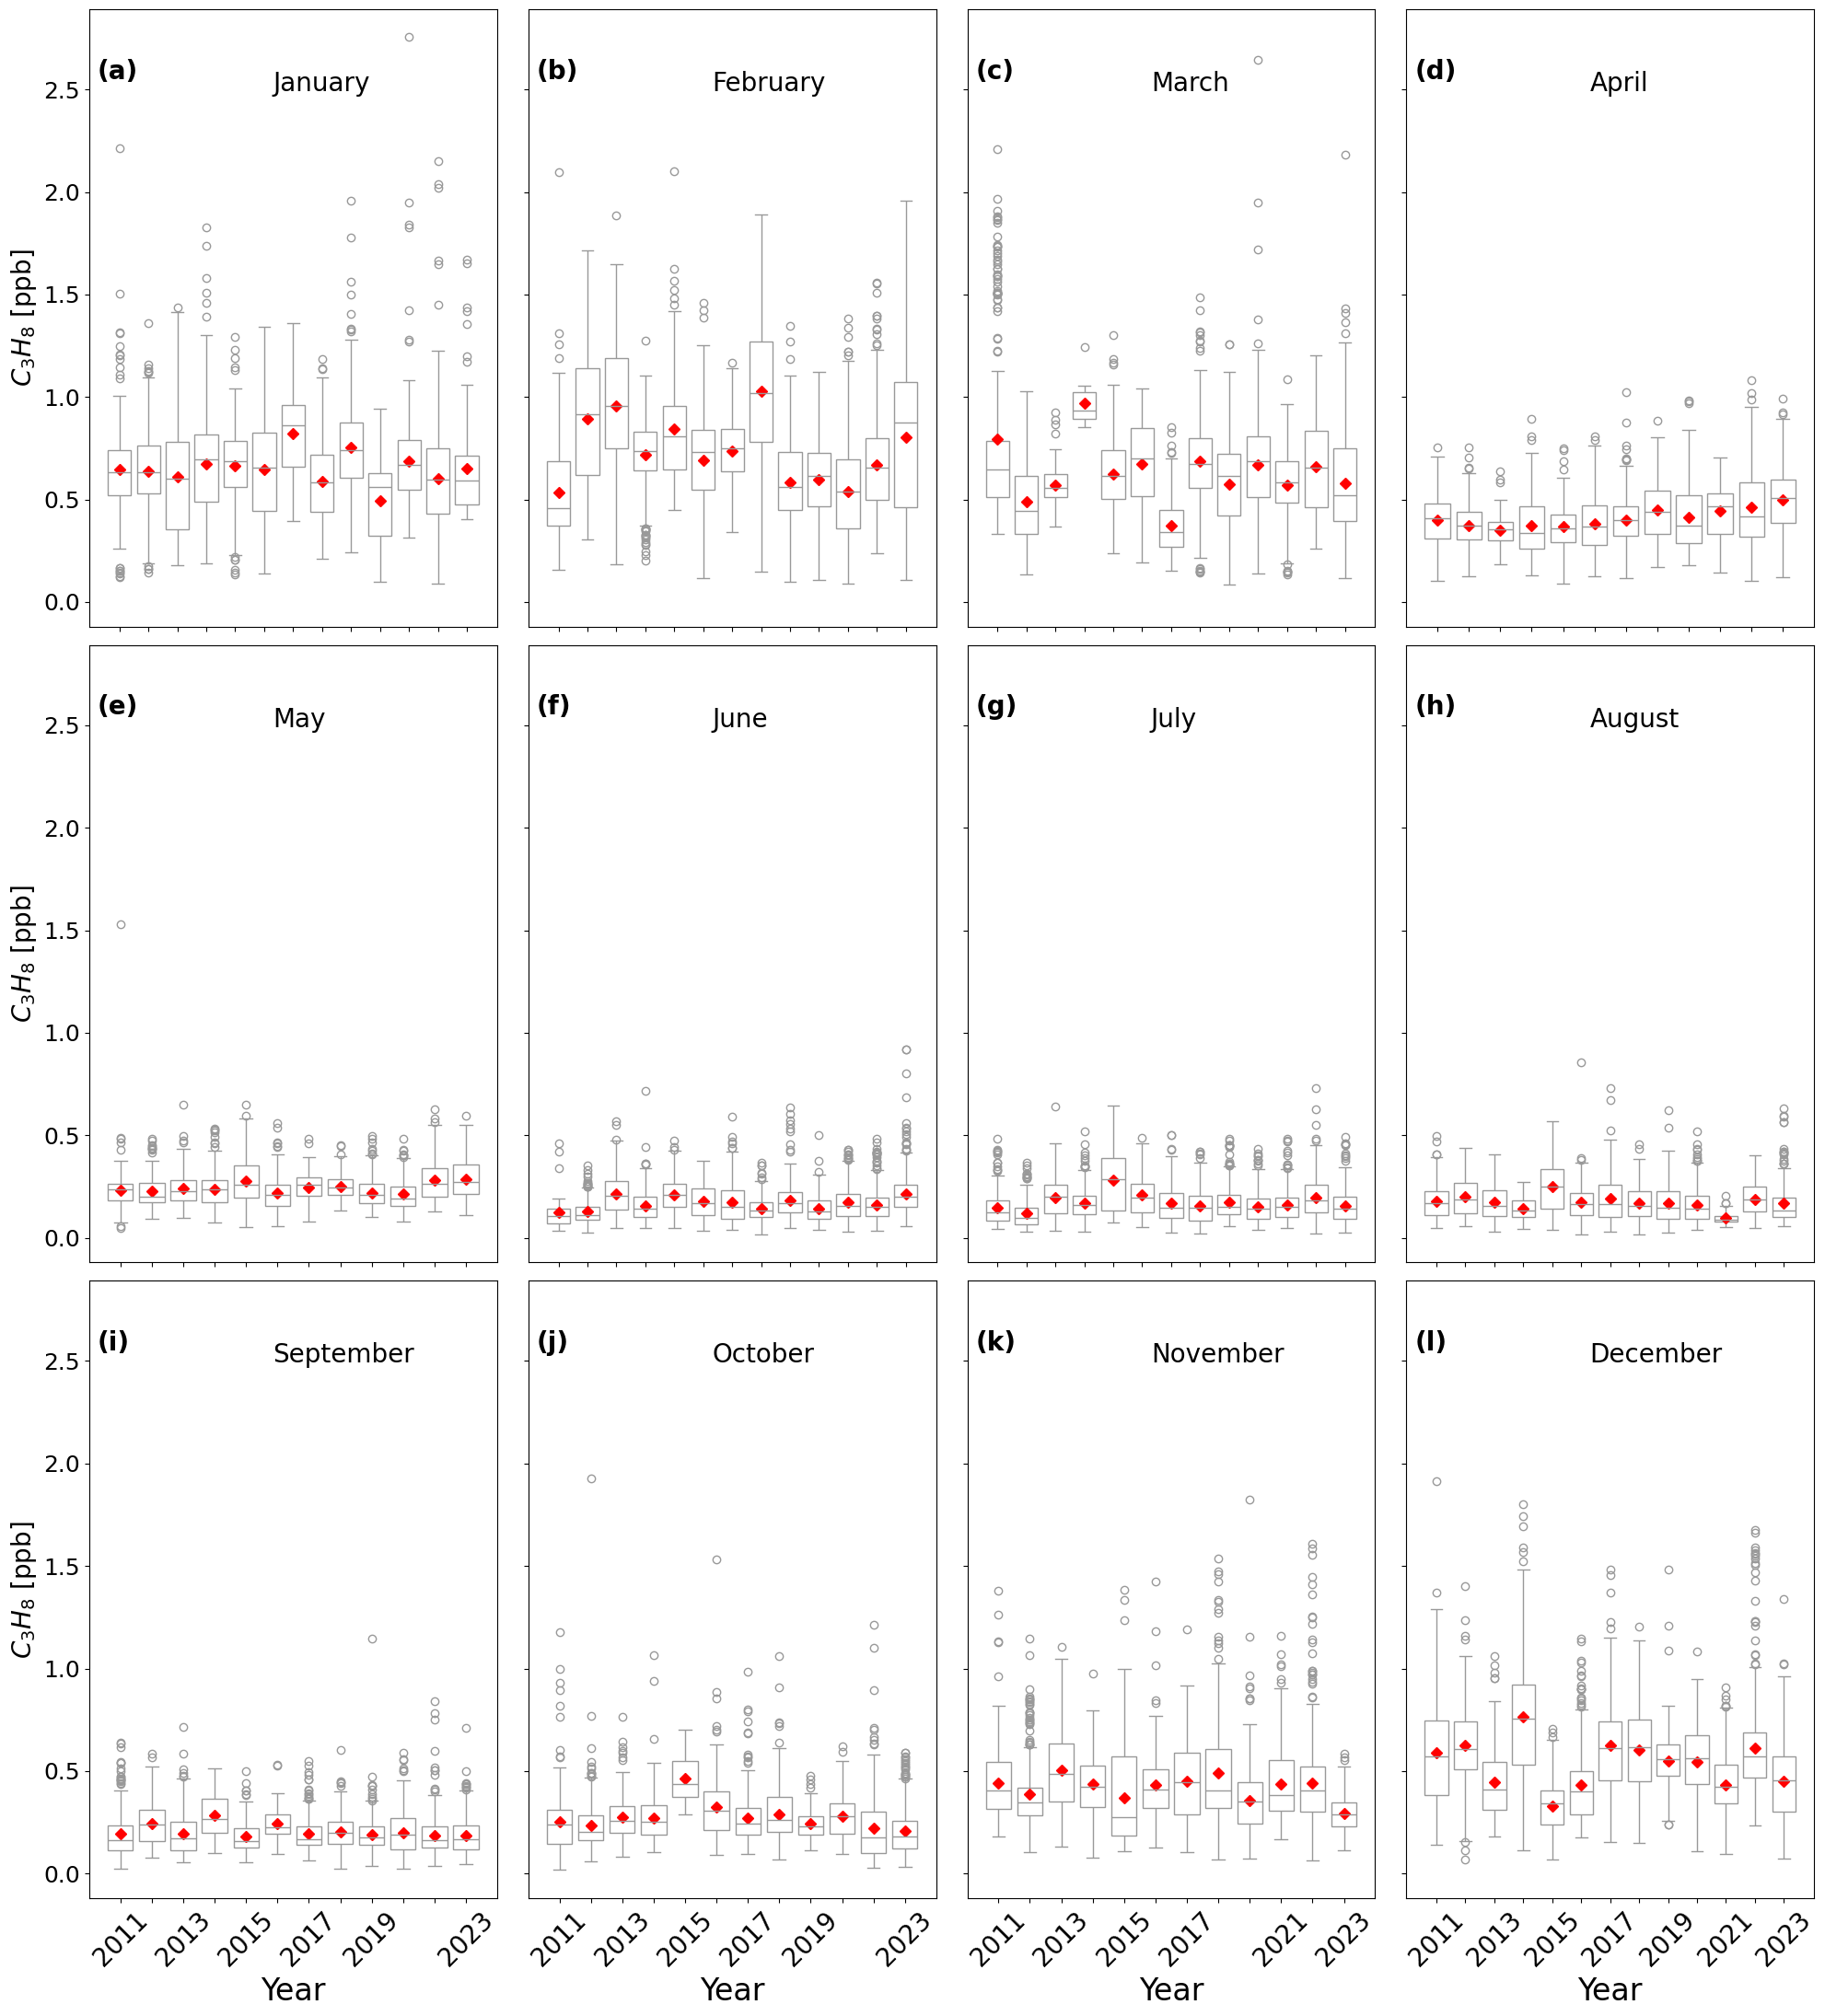

In [16]:
# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 22), sharey=True)
axes = axes.flatten()

# Labels (a) to (l)
panel_labels = [f'({chr(97 + i)})' for i in range(12)]

for month in range(1, 13):
    ax = axes[month - 1]
    month_data = df[df['month'] == month]
    if month_data.empty:
        continue

    # Sort years
    year_order = sorted(month_data['year'].unique())

    # Remove even years from x-axis labels
    odd_years = [year for year in year_order if year % 2 == 1]

    # Plot boxplot 
    sns.boxplot(
        data=month_data, x='year', y='C3H8_ppb', order=year_order,
        ax=ax, color='white', showmeans=False, showfliers=True
    )
    # Plot diamonds at the center of each box
    means = month_data.groupby('year')['C3H8_ppb'].mean()
    for i, year in enumerate(year_order):
        if year in means:
            ax.plot(i, means[year], marker='D', color='red', label='Mean' if month == 1 and i == 0 else "")
    # Set y-axis label on leftmost column
    if month in [1, 5, 9]:
        ax.set_ylabel('$C_3H_8$ [ppb]', fontsize=20)
    else:
        ax.set_ylabel('')

    # Set ytick label size
    ax.tick_params(axis='y', labelsize=18)

    # Show x-axis labels only on bottom row
    if month in [9, 10, 11, 12]:
        ax.set_xlabel('Year', fontsize=24)
        ax.set_xticks(range(len(year_order)))
        ax.set_xticklabels(
            [str(y) if y in odd_years else '' for y in year_order],rotation=45,
             fontsize=20
        )
    else:
        ax.set_xticklabels([])
        ax.set_xlabel('')

    # Remove title, add internal label (a–l) and month name
    ax.set_title('')
    ax.text(0.02, 0.92, f'{panel_labels[month - 1]}', transform=ax.transAxes,
            fontsize=20, fontweight='bold', va='top', ha='left')
    ax.text(0.45, 0.9, calendar.month_name[month], transform=ax.transAxes,
            fontsize=20, ha='left', va='top')

# Final layout
plt.tight_layout()
plt.savefig("C:\\YEAR1\\NMVOC\\figures\\c3h8_box_month.png", dpi=300)
plt.show()